## Exploratory Analysis of "120 Years of Olympics History Athletes and Results"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/athlete_events.csv')
regions = pd.read_csv('data/noc_regions.csv')

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [8]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Lets analyze the gold medal winners of all times

In [9]:
goldMedals = merged[merged.Medal == 'Gold']
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [10]:
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

#### Thus, the features like region, notes, age, height and weight have missing values. We need to consider that case while evaluating on them.

In [11]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

### Gold Medal Winners Ages Distribution : Maximum of them are 23/24 years old!

Text(0.5,1,'Distribution of Gold medals with Athlete Age!')

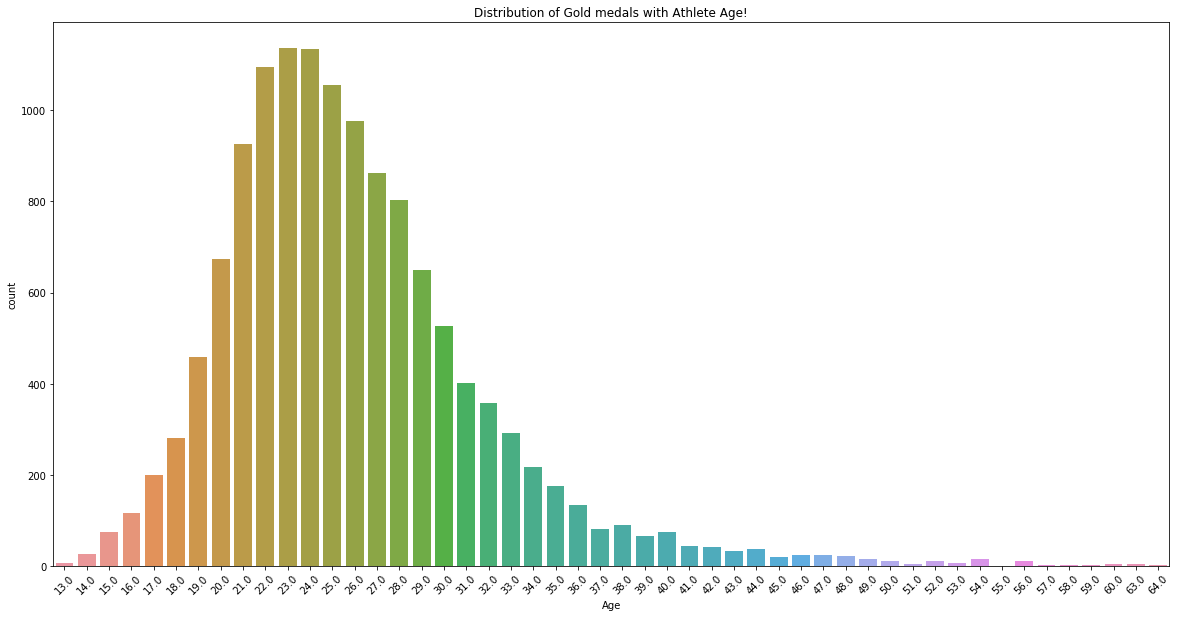

In [12]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
p1 = sns.countplot(goldMedals['Age'])
p1.set_xticklabels(p1.get_xticklabels(),rotation=45)
plt.title('Distribution of Gold medals with Athlete Age!')

### Gold Medal Winners Heights Distribution 
#### It is not balanced since some sports don't have hieght as their primary requirement or factor.

Text(0.5,1,'Distribution of Heights')

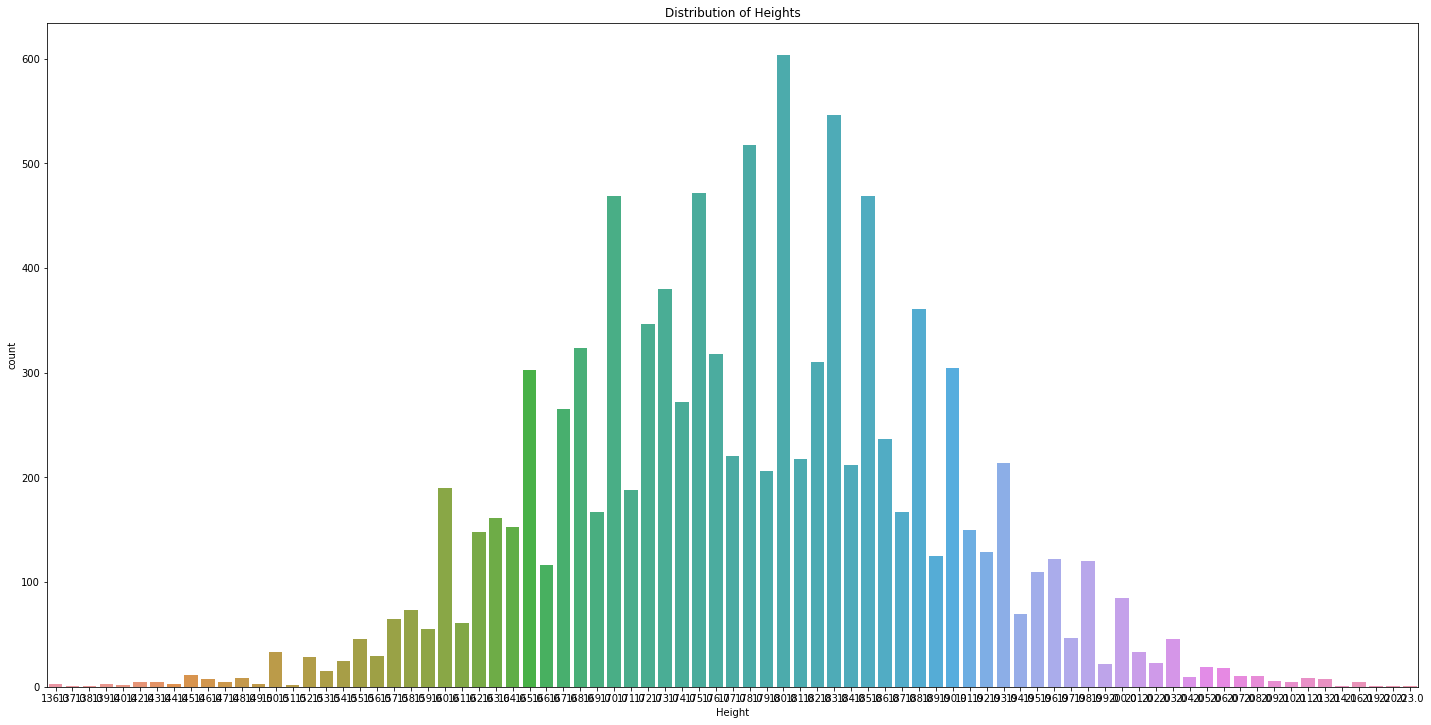

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(goldMedals['Height'])
plt.tight_layout()
plt.title('Distribution of Heights')

### Some athletes with gold medals are above the age of 50!

In [14]:
masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]

Text(0.5,1,'Sports for athletes over age 50')

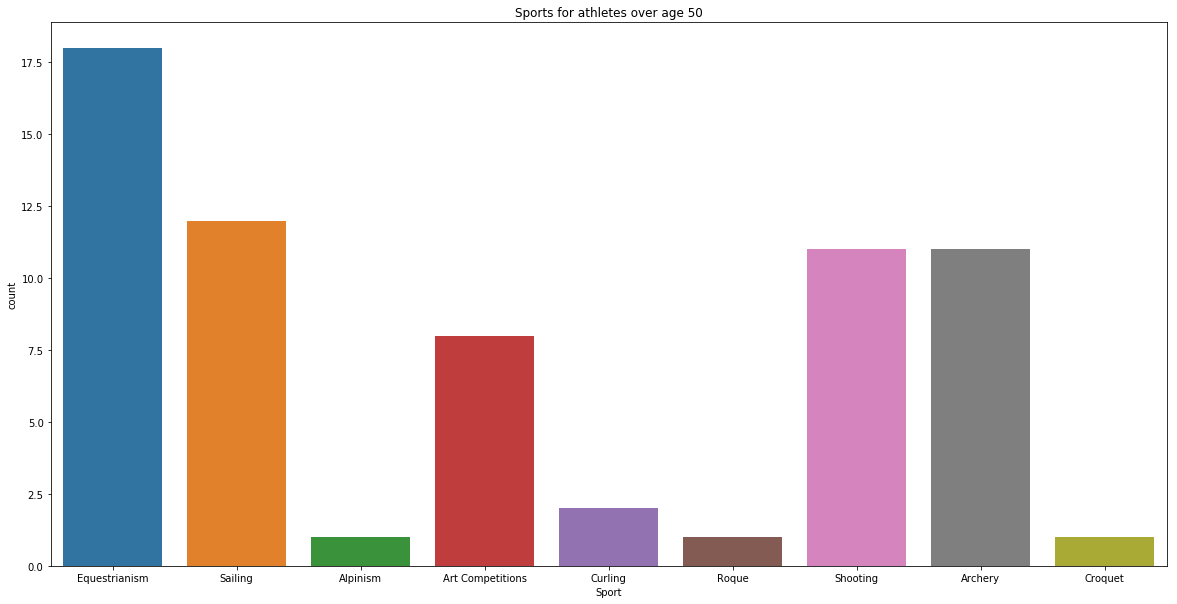

In [15]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
p2 = sns.countplot(masterDisciplines)
plt.title('Sports for athletes over age 50')

### Our senior sportmen excel in the following sports
#### Equestrianism, Sailing, Alpinism,  Art Competetions, Curling Sport, Roque, Shooting, Archery, Croquet, etc.
### Clearly, the above sports don't require high physical requirements.

### Women Athletes Analysis

In [16]:
women = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [17]:
women.head()
women.shape

(59443, 17)

### Women Medals Evolution Distribution! Glad to see that women have evolved over years in sports!

Text(0.5,1,'Women Medals Evolution')

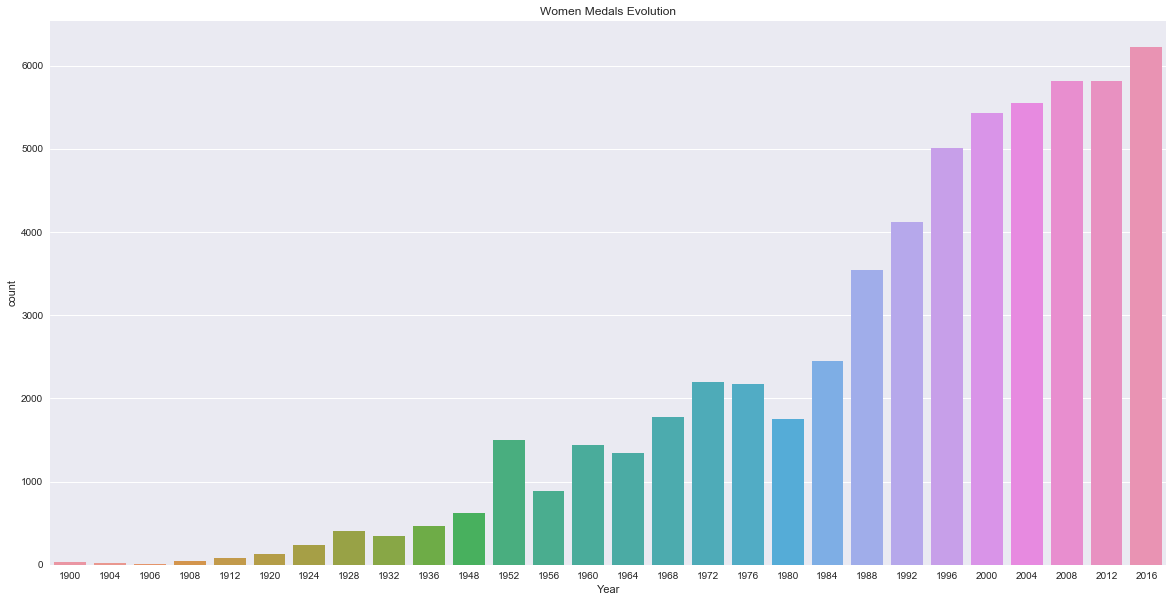

In [18]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(women['Year'])
plt.title('Women Medals Evolution')

### Countries that dominate Olympics medals : USA and Russia!

In [19]:
goldMedals.region.value_counts().head()

USA        2627
Russia     1599
Germany    1293
UK          657
Italy       567
Name: region, dtype: int64

### No Doubt USA slays in Basketball! 186 Gold Medals!

In [20]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [21]:
goldMedalsUSA.Event.value_counts().head(20)

Basketball Men's Basketball                        186
Swimming Men's 4 x 200 metres Freestyle Relay      111
Swimming Men's 4 x 100 metres Medley Relay         108
Rowing Men's Coxed Eights                          107
Basketball Women's Basketball                       95
Athletics Men's 4 x 400 metres Relay                81
Swimming Women's 4 x 100 metres Medley Relay        79
Swimming Women's 4 x 100 metres Freestyle Relay     78
Football Women's Football                           66
Athletics Men's 4 x 100 metres Relay                63
Swimming Men's 4 x 100 metres Freestyle Relay       58
Athletics Women's 4 x 100 metres Relay              50
Softball Women's Softball                           45
Athletics Women's 4 x 400 metres Relay              38
Rowing Women's Coxed Eights                         36
Rugby Men's Rugby                                   36
Volleyball Men's Volleyball                         36
Ice Hockey Men's Ice Hockey                         36
Swimming W

### USA Basketball players with maximum number of Gold Medals!

In [22]:
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['Sport'] == 'Basketball') & (goldMedalsUSA['Sex'] == 'M')].sort_values(['Year'])

In [23]:
basketballGoldUSA.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
71407,36368,"Joseph Cephis ""Joe"" Fortenberry",M,25.0,203.0,84.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
195790,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
213368,107150,Willard Theodore Schmidt,M,26.0,205.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
219204,110112,Carl Leslie Shy,M,27.0,183.0,77.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
22390,11790,Ralph English Bishop,M,20.0,193.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


In [24]:
groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()

In [25]:
groupedBasketUSA.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1936,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1948,101443,"Robert Lloyd Jackson ""Jack"" Robinson",M,21.0,183.0,82.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1952,58738,"Robert Earl ""Bob"" Kenney",M,21.0,188.0,84.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1956,128271,"James Patrick ""Jim"" Walsh",M,26.0,193.0,86.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1960,13371,"Robert Lewis ""Bob"" Boozer",M,23.0,203.0,99.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,NaN


### Height-Weight Correlation of Olympic Medalists

In [26]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

In [27]:
notNullMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


Text(0.5,1,'Height vs Weight of Olympics Medalists')

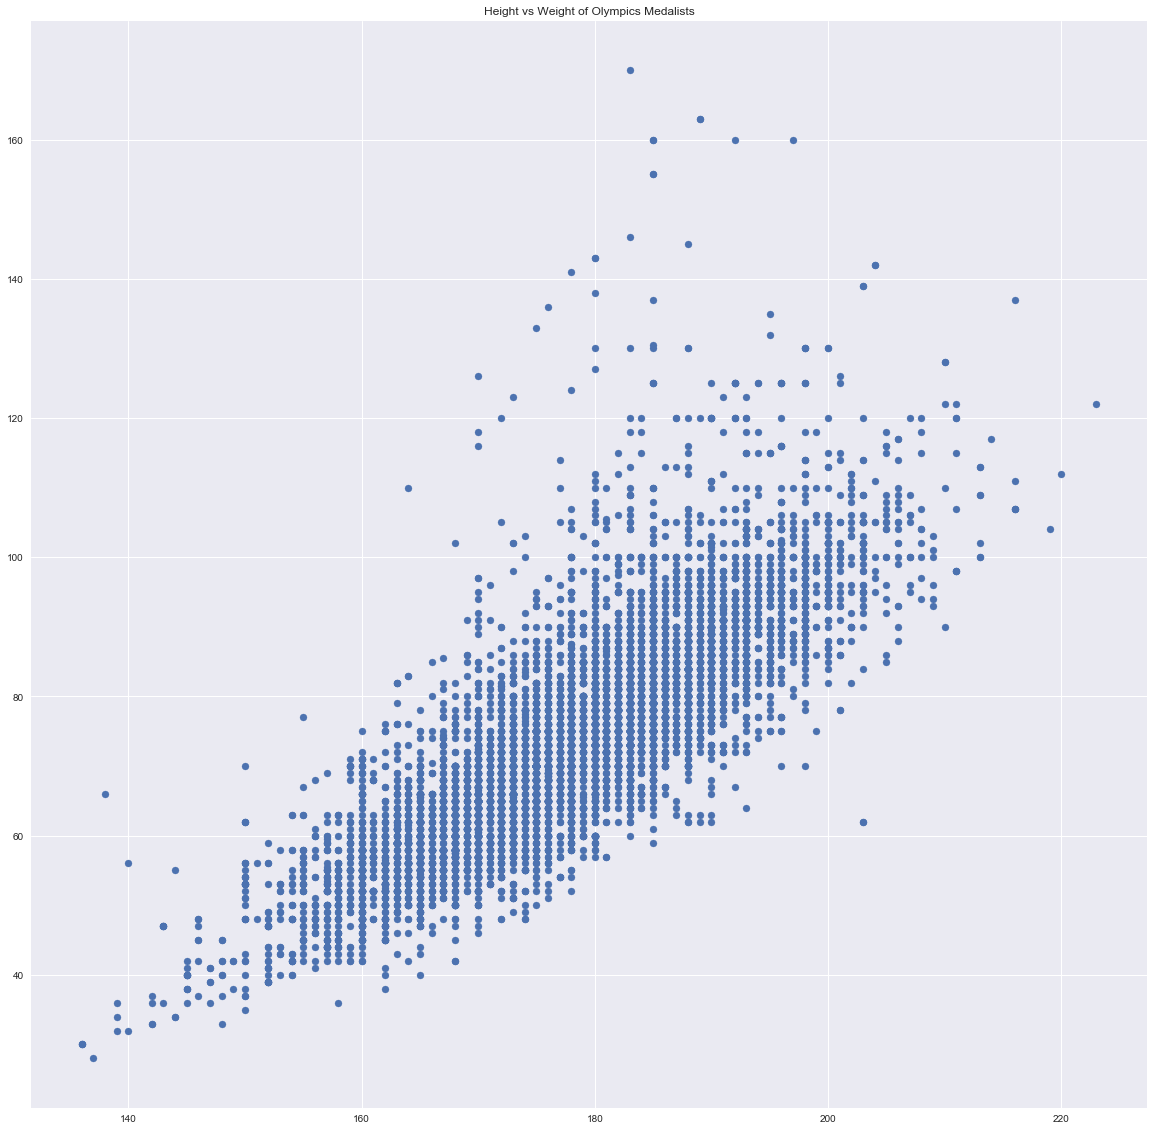

In [28]:
plt.figure(figsize=(20,20))
ax = plt.scatter(x='Height', y='Weight', data=notNullMedals)
plt.title('Height vs Weight of Olympics Medalists')

### Some Medalists with Extreme Heights and Weigths

### 1) Medalists with more than 150 Kilograms of weight!

In [29]:
notNullMedals.loc[notNullMedals['Weight'] > 150].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4404,2511,Vasily Ivanovich Alekseyev,M,30.0,185.0,160.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
4405,2511,Vasily Ivanovich Alekseyev,M,34.0,185.0,160.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
199643,100282,Hossein Reza Zadeh,M,22.0,185.0,155.0,Iran,IRI,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Iran,NaN
199644,100282,Hossein Reza Zadeh,M,26.0,185.0,155.0,Iran,IRI,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Iran,NaN


### 2) Medalists with Height greater than 7 Feet. Whoa!

In [30]:
notNullMedals.loc[notNullMedals['Height'] > 215].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
38381,19736,Tyson Cleotis Chandler,M,29.0,216.0,107.0,United States,USA,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,NaN
125770,63448,Serhiy Ivanovych Kovalenko,M,25.0,216.0,111.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Gold,Russia,NaN
166544,83657,Dmitry Aleksandrovich Musersky,M,23.0,219.0,104.0,Russia,RUS,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,Gold,Russia,NaN
177224,89103,Shaquille Rashuan O'Neal,M,24.0,216.0,137.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Gold,USA,NaN
181241,91087,Viktor Aleksandrovich Pankrashkin,M,31.0,220.0,112.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold,Russia,NaN


### 2) Medalists with Height lesser than 4 Feet. Whoa Again!

In [31]:
notNullMedals.loc[notNullMedals['Height'] < 140].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
13741,7444,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN
23763,12485,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania,NaN
69216,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia,NaN
69222,35292,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia,NaN
77906,39559,Maureen Jean George,F,24.0,138.0,66.0,Zimbabwe,ZIM,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN


### 4) Wang Xin (China) was just 28 Kilograms to win Gold in Beijing Olympics for Synchronized Diving Event!

In [32]:
notNullMedals.loc[notNullMedals['Weight'] < 30].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
256837,128605,Wang Xin (Ruoxue-),F,15.0,137.0,28.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Synchronized Platform,Gold,China,NaN


### Women Gold Medal Winners Height Distribution 

Text(0.5,1,'Women Height Distribution in Athletics')

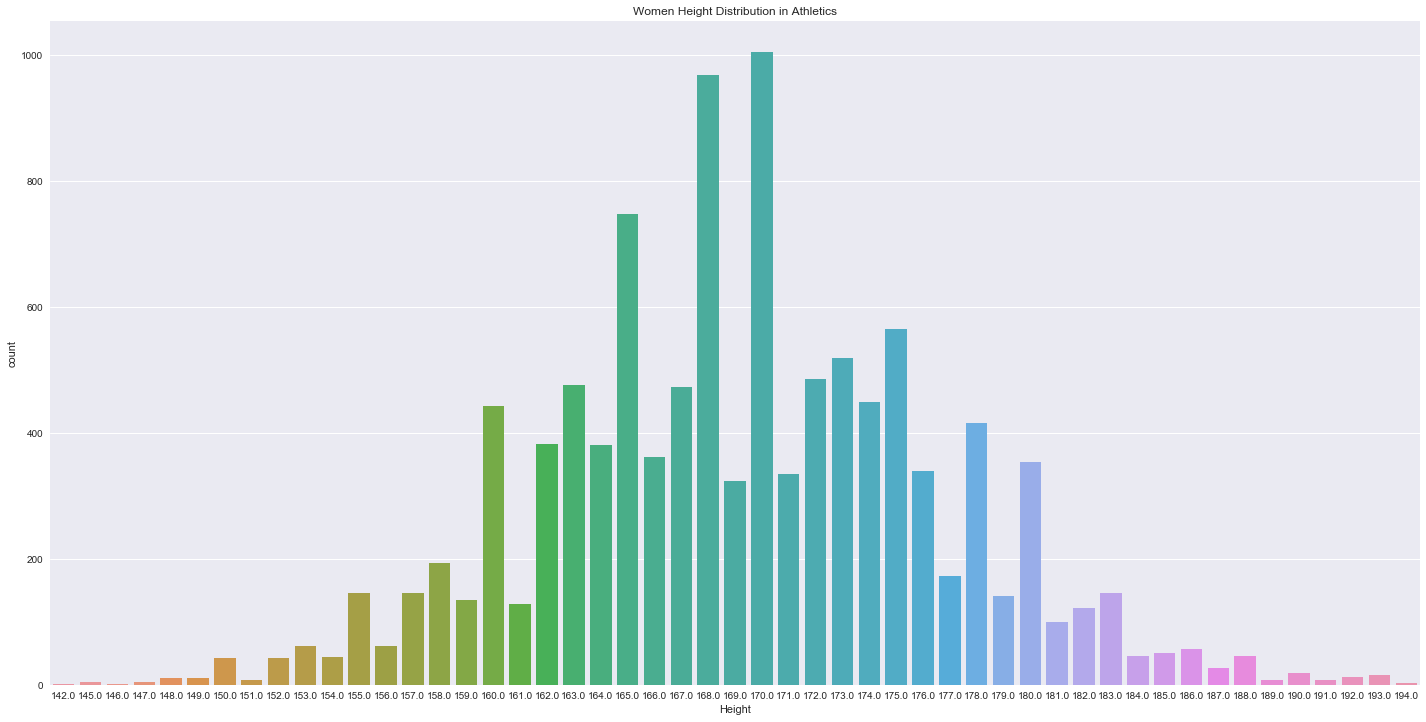

In [33]:
womenData = merged[(merged.Sex == "F") & (merged.Sport == "Athletics")]
plt.figure(figsize=(20,10))
sns.countplot(womenData['Height'])
plt.tight_layout()
plt.title("Women Height Distribution in Athletics")

### Some insights from Indian Athletes at Olympics

Text(0.5,1,'Indian Gold Medal Events')

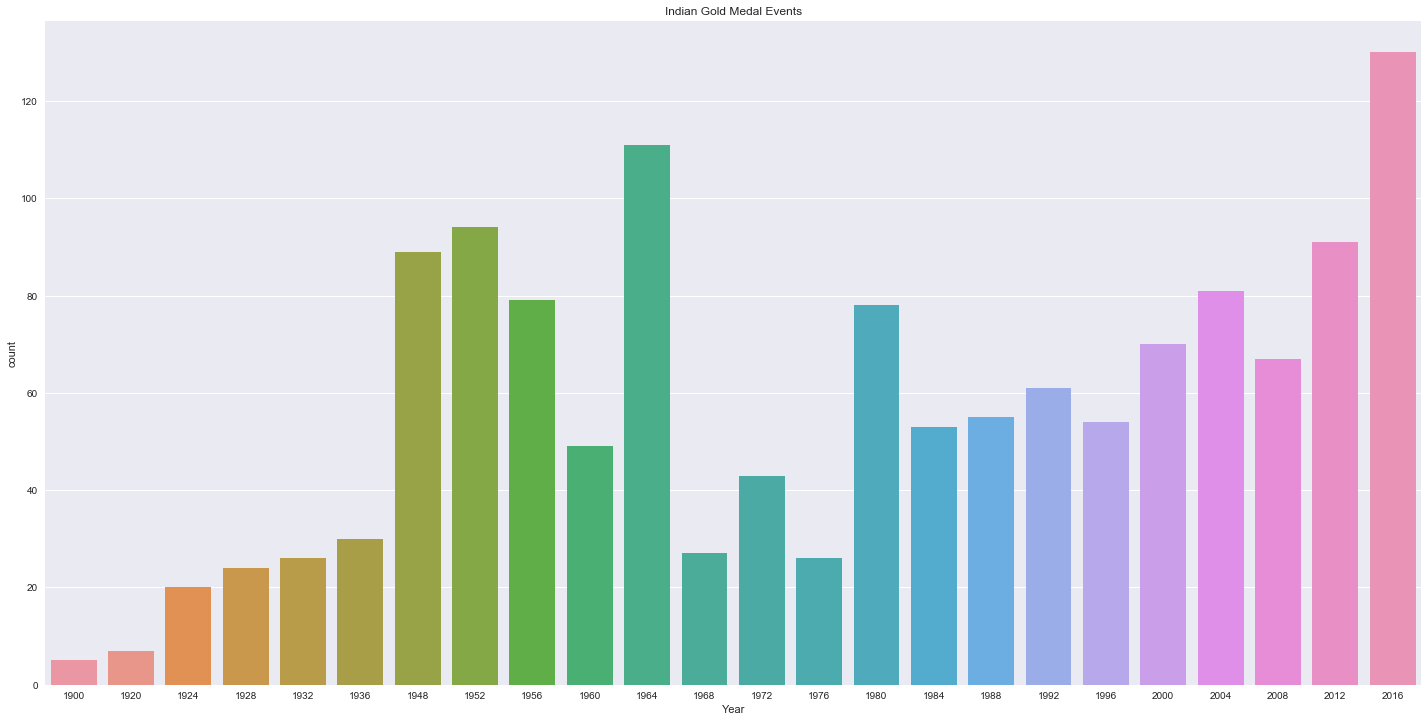

In [34]:
indianData = merged[(merged.Team == "India") & (merged.Season == "Summer")]
plt.figure(figsize=(20,10))
sns.countplot(indianData['Year'])
plt.tight_layout()
plt.title('Indian Gold Medal Events')

In [35]:
indiansInOlympics = merged[merged.Team == "India"]
indiansInOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


### Medal Ratio of Indian Athletes at Olympics

Text(0.5,1,'Medal Ratio of Indian Olympians')

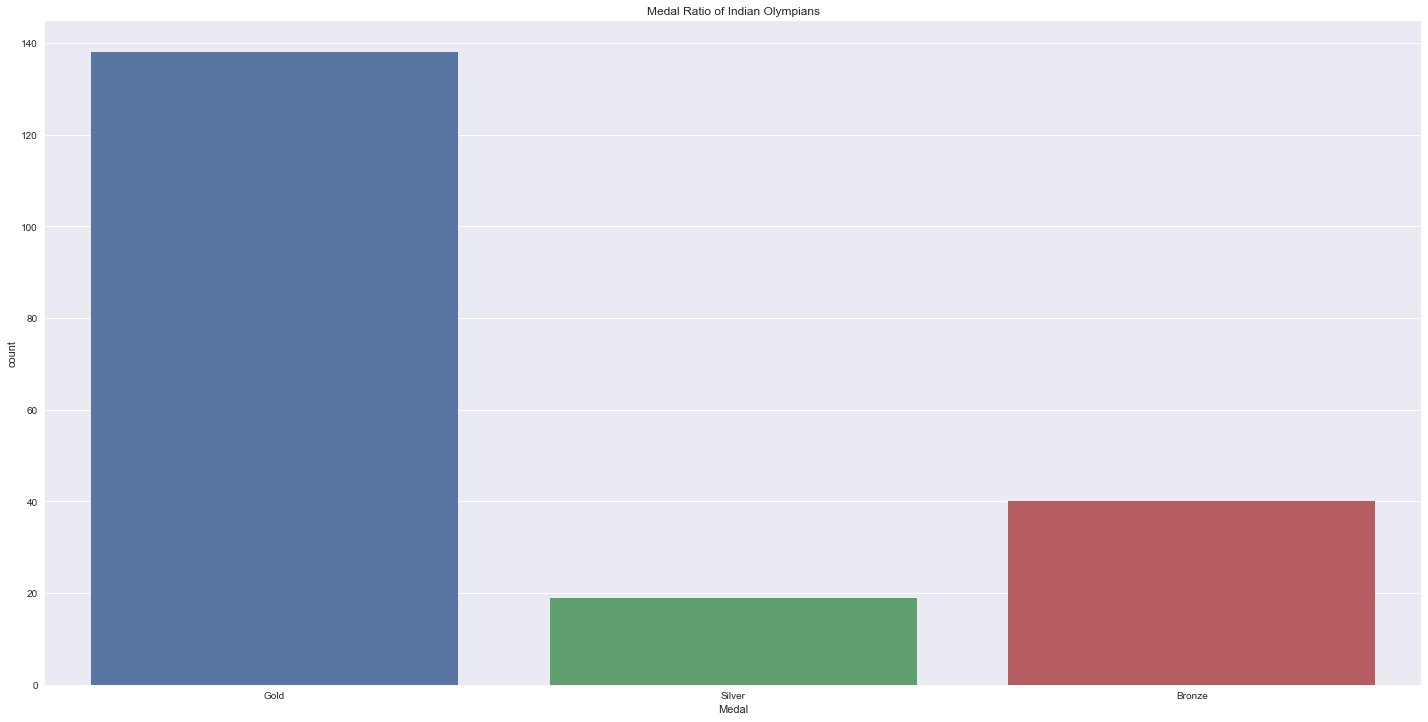

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(indiansInOlympics['Medal'])
plt.tight_layout()
plt.title('Medal Ratio of Indian Olympians')

### Evolution of Medals from Indian Athletes : 2016 Most Valuable year in Indian Olymipcs History!

Text(0.5,1,'Medal evolution of Indian Olympians')

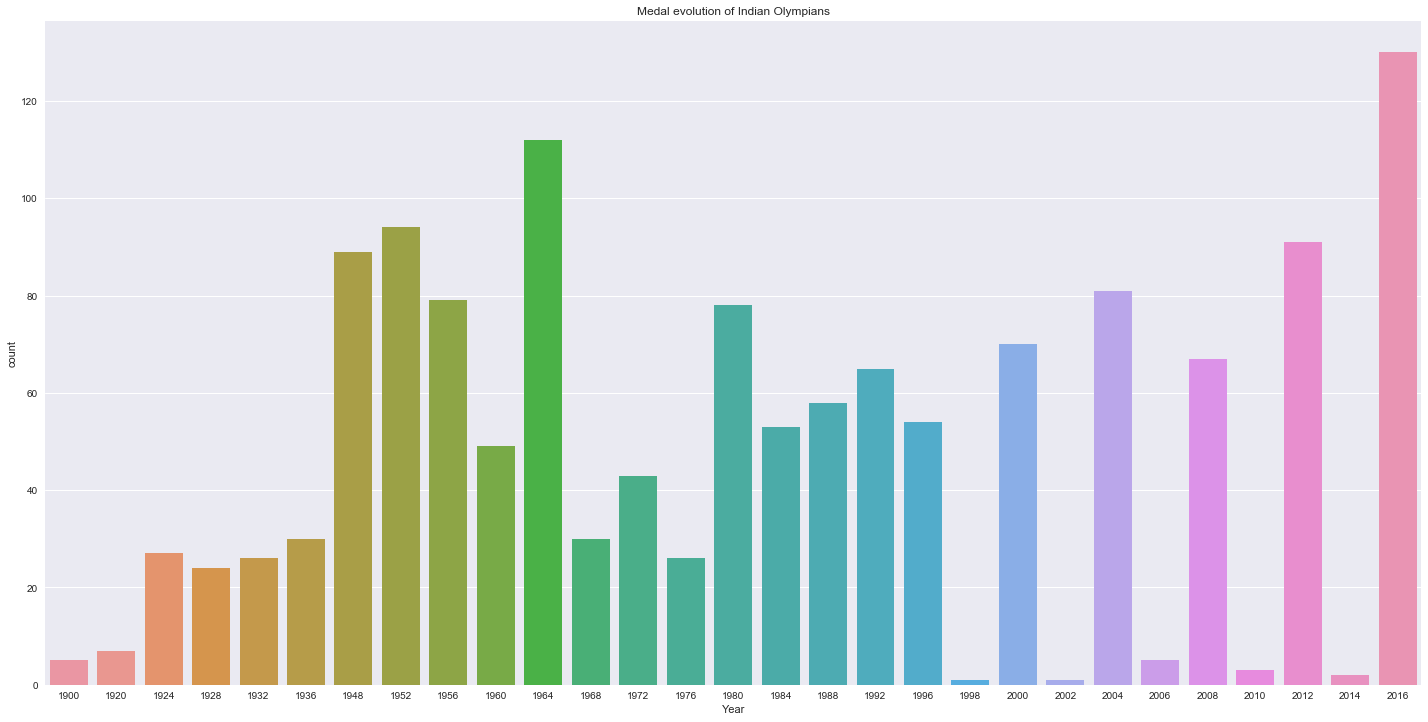

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(indiansInOlympics['Year'])
plt.tight_layout()
plt.title('Medal evolution of Indian Olympians')

### Gender wise Indian Gold medals ratio 

Text(0.5,1,'Medal Ratio of Indian Olympians')

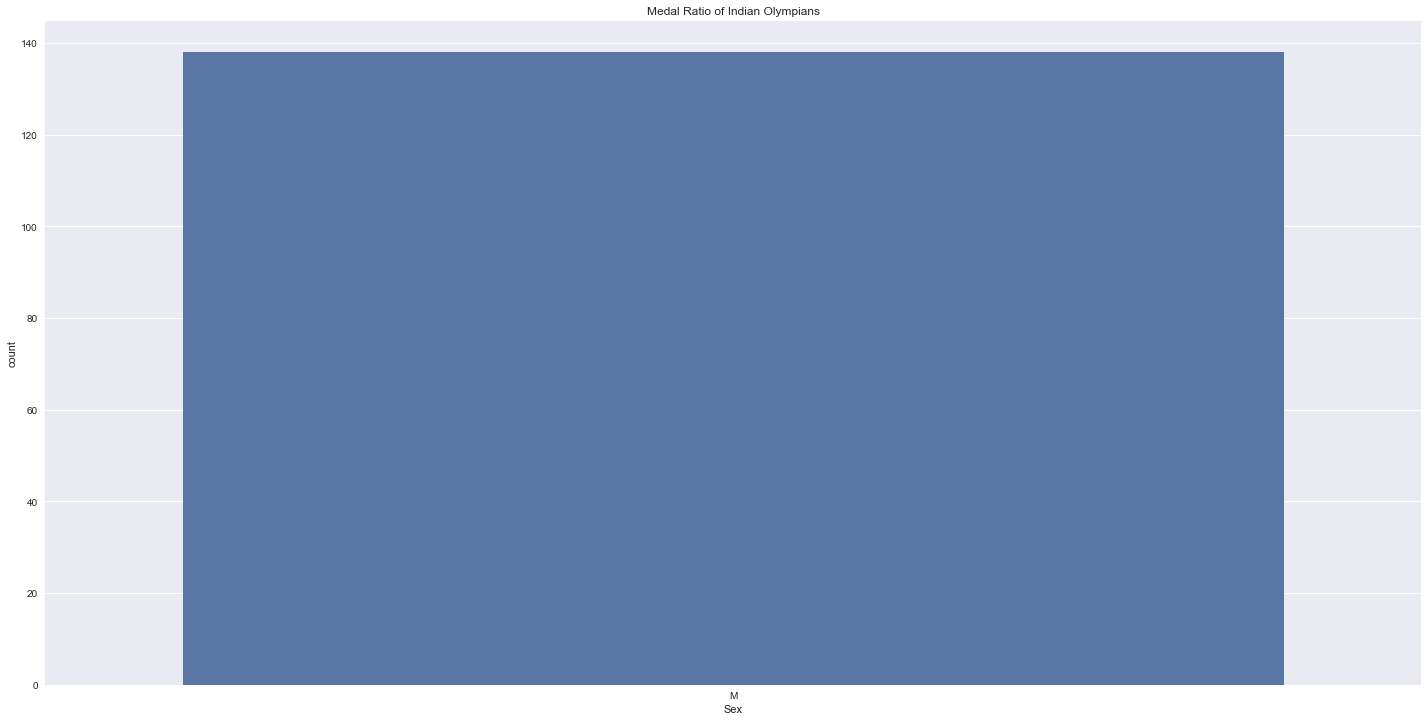

In [38]:
plt.figure(figsize=(20,10))
goldIndia = indiansInOlympics[indiansInOlympics.Medal == "Gold"]
sns.countplot(goldIndia['Sex'])
plt.tight_layout()
plt.title('Medal Ratio of Indian Olympians')

### Unfortunately, there have been no gold medals from Indian women in the Olympics history!

## There could be many more interesting insigts drawn from the rich Olympics history data! I would keep updating this more analysis as I work on this dataset.